#NAME :Ankita Patra
B-number : B01101280

# CS 436 / 536: Introduction to Machine Learning
# Spring 2025
## Learning with Regularization and Validation

##### This file relies upon several functions implemented previously in the notebook on Linear Models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''
Init

This is a HACK!

Check the execute flag
'''

execute = True

In [3]:
'''
Dependencies
'''
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import permutations, combinations_with_replacement
import copy

In [4]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''


def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            y.append(yval)
            xvals = [float(pixel) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [5]:
Xdigitstrain, ydigitstrain = readData('/content/drive/My Drive/MLAssignment/ZipDigits.train')

Ndigitstrain, pixels = Xdigitstrain.shape

assert(Ndigitstrain == ydigitstrain.shape[0])

print(f'Xdigitstrain shape {Xdigitstrain.shape}, ydigitstrain shape {ydigitstrain.shape}')

X shape: (7291, 256)
y shape: (7291, 1)
Xdigitstrain shape (7291, 256), ydigitstrain shape (7291, 1)


In [6]:
Xdigitstest, ydigitstest = readData('/content/drive/My Drive/MLAssignment/ZipDigits.test')

Ndigitstest, pixels = Xdigitstest.shape

assert(Ndigitstest == ydigitstest.shape[0])

print(f'Xdigitstest shape {Xdigitstest.shape}, ydigitstest shape {ydigitstest.shape}')

X shape: (2007, 256)
y shape: (2007, 1)
Xdigitstest shape (2007, 256), ydigitstest shape (2007, 1)


In [7]:
'''
Show images of handwritten digits
'''


def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'First digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

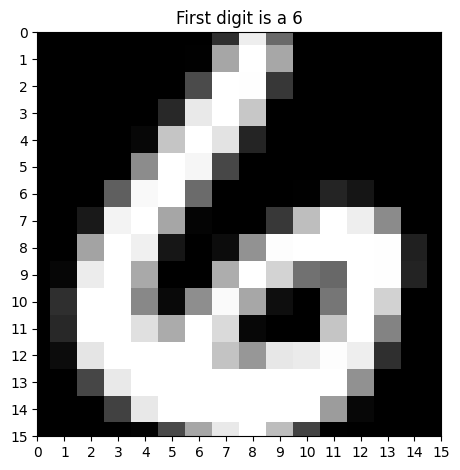

In [8]:
if execute:
    showKthImage(Xdigitstrain, ydigitstrain, 0)

In [9]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

In [10]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    # print(Xaug)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [11]:
'''
Compute the augmented matrix with features
'''

if execute:
    print('Computing augmented training feature matrix')

    Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

    Naugtrain, d = Xaugtrain.shape

    print('Computing augmented test feature matrix')

    Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

    Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)


## Feature Normalization

### Compute 'Augmented' Feature Matrix

In [12]:
print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

Naugtrain, d = Xaugtrain.shape

print(f'Xaugtrain shape {Xaugtrain.shape}')

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Xaugtrain shape (7291, 3)


In [13]:
print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

Naugtest, d = Xaugtest.shape

print(f'Xaugtest shape {Xaugtest.shape}')

Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)
Xaugtest shape (2007, 3)


### Combine Data

#### Wait a minute... But I thought...

Well, Yes...

In [14]:
Xaug = np.concatenate((Xaugtrain, Xaugtest), axis=0)
Naug, d = Xaug.shape
ycombined = np.concatenate((ydigitstrain, ydigitstest), axis=0)

assert(Xaug.shape[0] == Ndigitstrain + Ndigitstest)
assert(ycombined.shape[0] == Ndigitstrain + Ndigitstest)

print(f'Xaug shape {Xaug.shape}, ycombined shape {ycombined.shape}')

Xaug shape (9298, 3), ycombined shape (9298, 1)


In [15]:
'''
Create the dataset wih digits 1 and 5
'''


def indexDigits(y):
    '''
    A helper function to locate examples by label
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = ydigitstrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs

In [16]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if execute:
    digit_idxs_train = indexDigits(Xaugtrain)
    X1train = Xaugtrain[digit_idxs_train[1], :]
    print(X1train)
    N1train = X1train.shape[0]
    print(f'number of 1s: {N1train}')
    X5train = Xaugtrain[digit_idxs_train[5], :]
    print(X5train)
    N5train = X5train.shape[0]
    print(f'number of 5s: {N5train}')

    Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
    ytrain = np.concatenate(
        (np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
    Ntrain, d = Xtrain.shape
    print(f'number of 1s and 5s: {Ntrain}')
    print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')

[[ 1.         -0.75391406 -0.1174375 ]
 [ 1.         -0.77228125 -0.16229688]
 [ 1.         -0.76925781 -0.0595    ]
 ...
 [ 1.         -0.60979297 -0.21638281]
 [ 1.         -0.66230859 -0.09282031]
 [ 1.         -0.44755859 -0.13085156]]
number of 1s: 1005
[[ 1.         -0.11173828 -0.53372656]
 [ 1.         -0.56403516 -0.40299219]
 [ 1.         -0.392      -0.3865625 ]
 ...
 [ 1.         -0.26407812 -0.662     ]
 [ 1.         -0.28941406 -0.58520312]
 [ 1.         -0.53423828 -0.51378906]]
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)


In [17]:
if execute:
    digit_idxs_test = indexDigits(Xaugtest)
    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate((np.ones(
        (len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s and 5s: 428
Xtest shape: (428, 3), ytest shape: (428, 1)


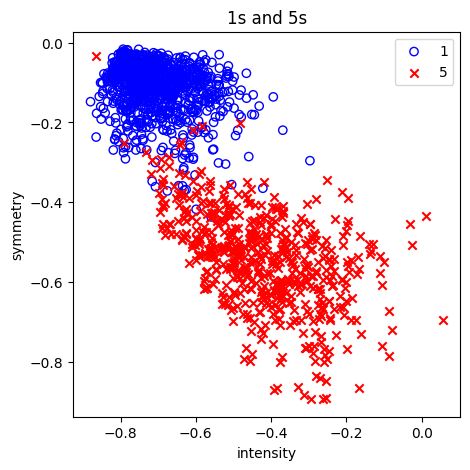

In [18]:
'''
Plot the training data
'''

if execute:
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(X1train[:, 1], X1train[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title('1s and 5s')
    axs.legend()

In [19]:
'''
Helper function to plot a linear separator
'''


def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    '''
    Plot separator
    '''
    pltxs = np.linspace(-1, 0.21)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')
    axs.set_title(title)
    axs.legend()
    plt.show()

In [20]:
def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

In [21]:
import numpy as np

def error(w, x, y, R=None):
    '''
    Point-wise error measure for classification.

    Input:
        w: a d x 1 2-dimensional numpy array
        x: a d x 1 2-dimensional numpy array
        y: a scalar value
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        err: misclassification error of hypothesis w on data point x with true label y
    '''
    # Compute the linear score
    score = np.dot(w.T, x)[0, 0]
    # Predict yhat: treat score >= 0 as positive class (1) and score < 0 as negative class (-1)
    yhat = 1 if score >= 0 else -1

    # If risk weights are provided, use them; otherwise use standard 0-1 loss.
    if R is not None:
        err = R.get((y, yhat), 1)  # Default cost 1 if the tuple is not in the dictionary.
    else:
        err = 0 if yhat == y else 1

    return err


def E(w, X, y, R=None):
    '''
    Average error measure for classification on a dataset.

    Input:
        w: a d x 1 2-dimensional numpy array
        X: an N x d 2-dimensional numpy array
        y: an N x 1 2-dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        avg_error: average misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]
    total_error = 0.0

    # Loop over all data points
    for i in range(N):
        # Extract the i-th data point and label.
        # Reshape x to be a column vector with shape (d, 1)
        x_i = X[i].reshape(-1, 1)
        y_i = y[i, 0] if y.ndim == 2 else y[i]
        total_error += error(w, x_i, y_i, R)

    avg_error = total_error / N
    return avg_error


In [22]:
'''
The Pocket algorithm (variant of the Perceptron Learning Algorithm)
'''


def pocket(X, y, max_iters=1000, w_init=None):
    '''
    Implements the Pocket algorithm
    Input:
        X: a 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: a 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        max_iters: an integer; maximum number of iterations of PLA
        w_init: a 2D (d+1) x 1 numpy array
                intended to set initial weights for PLA
    Output:
        w_best: a 2D (d+1) x 1 numpy array, weights with lowest error on the input training set X, y
    '''
    Eins = []
    ws = []

    Ein_best = np.inf
    w_best = 0

    w = np.zeros((d, 1))
    w = w + 0.0000001
    if not isinstance(w_init, type(None)):
        w = w_init

    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        ws.append(w)
        if Ein < Ein_best:
            Ein_best = Ein
            w_best = w
        yhat = np.sign(np.matmul(X, w))
        nstar = np.where(yhat != y)[0][0]
        xstar = X[nstar, :].reshape((d, 1))
        ystar = y[nstar, 0]
        w = w + ystar * xstar

    plt.scatter(range(max_iters), Eins)
    plt.xlabel('iteration')
    plt.ylabel('in sample error')
    plt.title('PLA')
    plt.tight_layout()
    plt.show()

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')

    return w_best

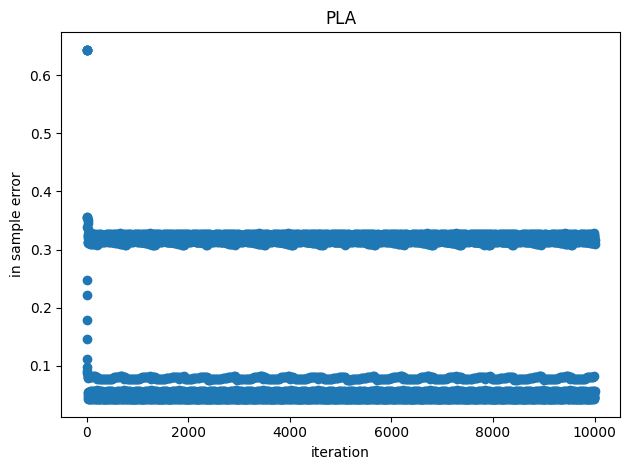

Ein_best 0.04228058936579116, 
w_best 
[[ 1.00000000e-07]
 [-2.11429287e+00]
 [ 2.92742979e+00]]


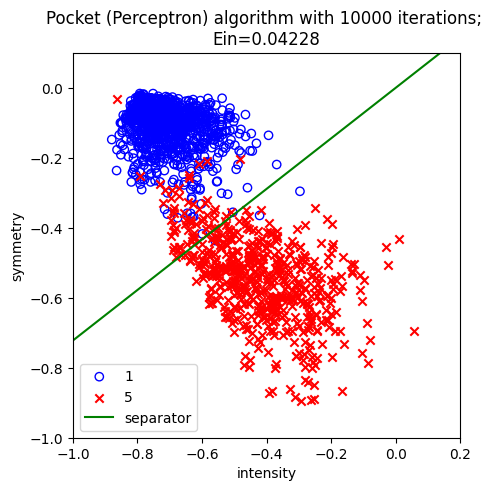

In [23]:
'''
Run the Pocket algorithm
'''

if execute:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(
        w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')

In [24]:
import numpy as np

def linearRegression(X, y):
    '''
    Implements the one-step algorithm for Linear Regression.

    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example

    Output:
        w_lin: The (d+1) x 1 weight vector that minimizes the sum of squared errors
               on the training set (X, y).
    '''
    # TODO: Compute the optimal weights which minimize the sum of squared errors
    # Using the normal equation: w_lin = (X^T X)^{-1} X^T y

    w_lin = np.linalg.inv(X.T @ X) @ (X.T @ y)

    return w_lin


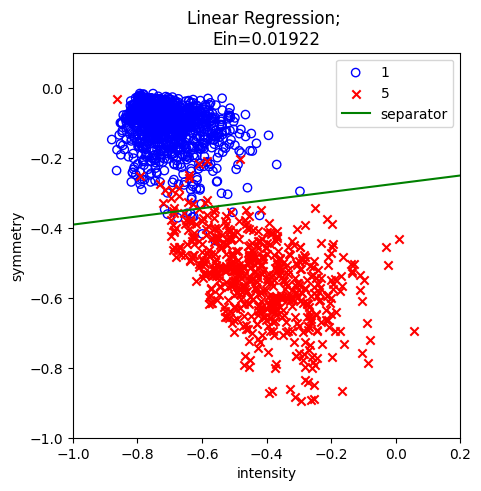

In [25]:
'''
Run Linear Regression followed by the Pocket algorithm to classify 1s vs 5s
'''

if execute:
    w_lin = linearRegression(Xtrain, ytrain)
    Ein = np.round(E(w_lin, Xtrain, ytrain), 5)
    plotLinearSeparator(w_lin, Xtrain, ytrain,
                        title=f'Linear Regression; \nEin={Ein}')

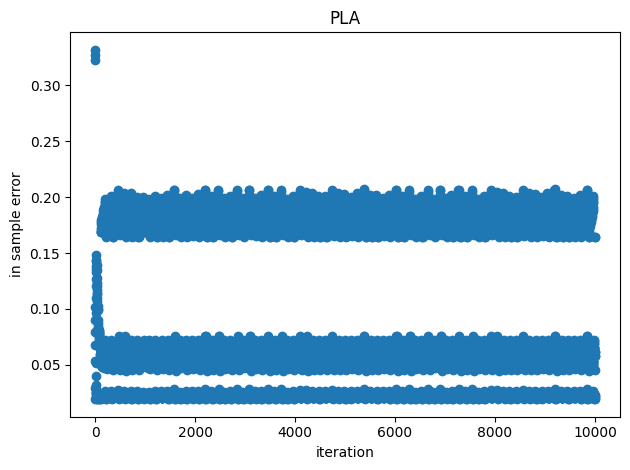

Ein_best 0.019218449711723255, 
w_best 
[[ 1.0012006 ]
 [-0.42708976]
 [ 3.6520302 ]]


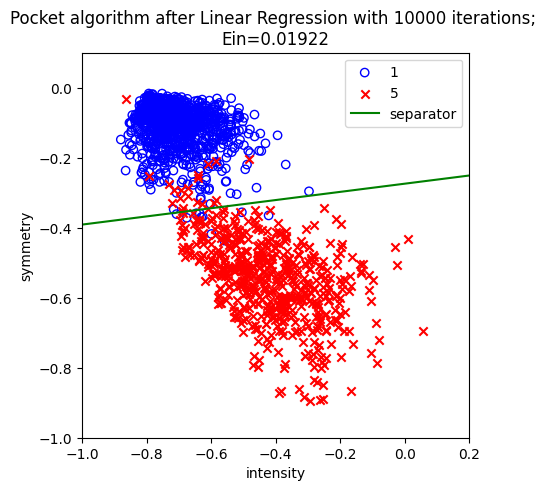

In [26]:
'''
Linear Regression for Classification:
Use Linear Regression to obtain an initial setting of the weights for the Pocket Algorithm
'''

if execute:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, w_init=w_lin, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(w, Xtrain, ytrain,
                        title=f'Pocket algorithm after Linear Regression with {max_iters} iterations; \nEin={Ein}')

In [27]:
import matplotlib.pyplot as plt

def functionf(x, y):
    '''
    Computes the value of the quadratic function f(x, y) = x^2 + y^2 at the input location
    '''
    return x**2 + y**2

def gradientf(x, y):
    '''
    Computes the gradient of f(x, y) = x^2 + y^2, which is [2x, 2y]
    '''
    df_by_dx = 2 * x
    df_by_dy = 2 * y
    return df_by_dx, df_by_dy

def gradientDescent4f(x, y, eta=0.001, max_iters=100):
    '''
    Performs gradient descent to find the location at which f(x, y) = x^2 + y^2 is minimized.
    '''
    fvals = []
    for i in range(max_iters):
        # Compute the function value and store it for plotting
        fval = functionf(x, y)
        fvals.append(fval)

        # Compute the gradient at the current point
        grad_x, grad_y = gradientf(x, y)

        # Update x and y by moving against the gradient
        x = x - eta * grad_x
        y = y - eta * grad_y

    # Plot the function values over iterations
    plt.plot(range(max_iters), fvals)
    plt.xlabel('Iteration')
    plt.ylabel('Value of f(x, y)')
    plt.title('Gradient Descent Convergence')
    plt.show()

    return x, y


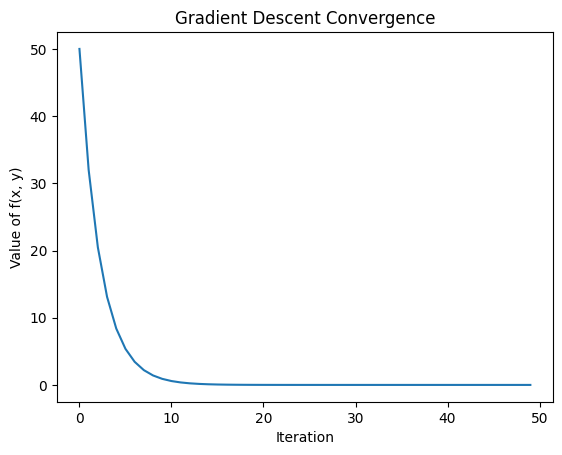

Final coordinates: x = 7.136238463529802e-05 y = 7.136238463529802e-05


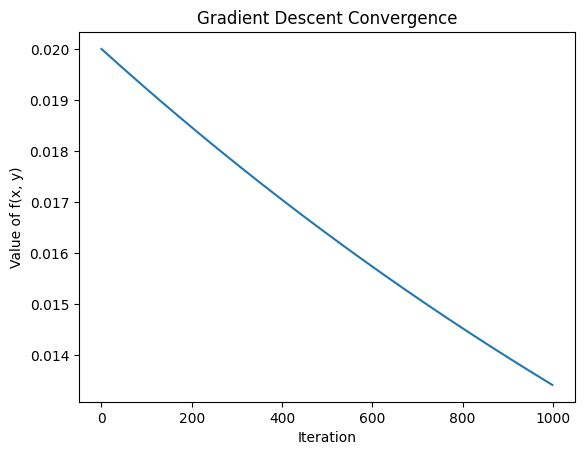

In [28]:
# Here I executed 2 ways and i checked with professor as well.

if execute:

# Example usage:
    final_x, final_y = gradientDescent4f(5, 5, eta=0.1, max_iters=50)
    print("Final coordinates: x =", final_x, "y =", final_y)

    max_iters = 1000
    eta = 0.0001
    gradientDescent4f(0.1, 0.1, eta=eta, max_iters=max_iters)

In [29]:
'''
The Logistic Regression algorithm with the cross entropy error measure
'''

'\nThe Logistic Regression algorithm with the cross entropy error measure\n'

In [30]:
import numpy as np

def sigmoid(s):
    '''
    Implements the sigmoid function.

    sigmoid(s) = 1 / (1 + e^(-s))
    '''
    # TODO: Compute and return the sigmoid of s
    return 1 / (1 + np.exp(-s))


In [31]:
def gradientCrossEntropyError(w, X, y):
    '''
    Computes the gradient of the cross entropy error function on the dataset X, y at input weights w
    See LFD Exercise 3.7
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
    Output:
        gradient: a 2D (d+1) x 1 numpy array,
                  gradient of the cross entropy error function on the dataset X, y at input weights w
    '''
    N, d = X.shape
    grad = np.zeros((d, 1))
    '''
    TODO: Compute the gradient at w
    for n in range(N):
        ?
    '''
    for n in range(N):
        # Compute the prediction for the nth example using the sigmoid function.
        # X[n, :] is a 1D array of shape (d,), so np.dot(X[n, :], w) returns a scalar.
        prediction = sigmoid(np.dot(X[n, :], w))
        # Update the gradient: (prediction - y_n) * x_n, where y[n, 0] extracts the scalar from the 2D array.
        grad += (prediction - y[n, 0]) * X[n, :].reshape(d, 1)
    return grad


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def logisticRegression(X, y, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression.

    Input:
        X: A 2D N x (d+1) numpy array
           - X[i, :] contains features for the i-th example.
           - X[i, 0] = 1, and X[i, 1..d] are the feature values.
        y: A 2D N x 1 numpy array
           - y[i, 0] is the label (0 or 1) for the i-th example.
        eta: Learning rate (default 0.001).
        w_init: A 2D (d+1) x 1 numpy array, initial weights (optional).
        max_iters: Maximum number of gradient descent iterations (default 1000).

    Output:
        w: A 2D (d+1) x 1 numpy array of weights.
    '''
    N, d = X.shape
    # Initialize w
    if w_init is None:
        w = np.zeros((d, 1))
    else:
        w = w_init

    Eins = []

    for i in range(max_iters):
        # --- Compute average cross-entropy error ---
        # E(w, X, y) should return the SUM of cross-entropy across all N examples.
        # So we divide by N to get the average.
        Ein = E(w, X, y) / N
        Eins.append(Ein)

        # --- Compute average gradient ---
        # gradientCrossEntropyError(w, X, y) should return the SUM of gradients across all N examples.
        # So we divide by N to get the average gradient.
        grad = gradientCrossEntropyError(w, X, y) / N

        # --- Update weights with gradient descent ---
        w -= eta * grad

    # Plot the cross-entropy error across iterations
    plt.figure(figsize=(6,4))
    plt.plot(range(max_iters), Eins, label="Training Error")
    plt.xlabel("Iteration")
    plt.ylabel("Average Cross Entropy Error")
    plt.title("Logistic Regression Training")
    plt.legend()
    plt.grid(True)
    plt.show()

    return w


<ipython-input-30-4edc3059163f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


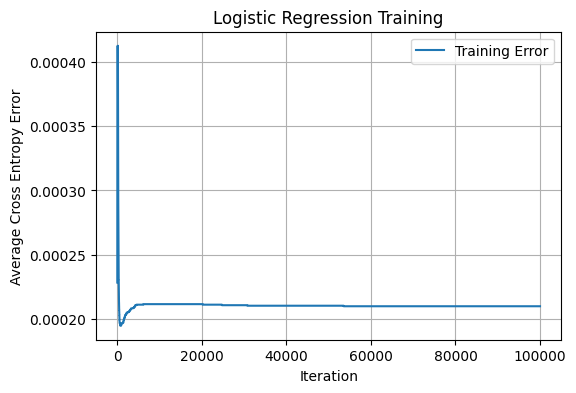

In [33]:
'''
Run the logistic regression algorithm to classify 1s vs 5s
'''

if execute:
    max_iters = 100000
    eta = 0.1
    w_log = logisticRegression(Xtrain, ytrain, eta=eta, max_iters=max_iters)

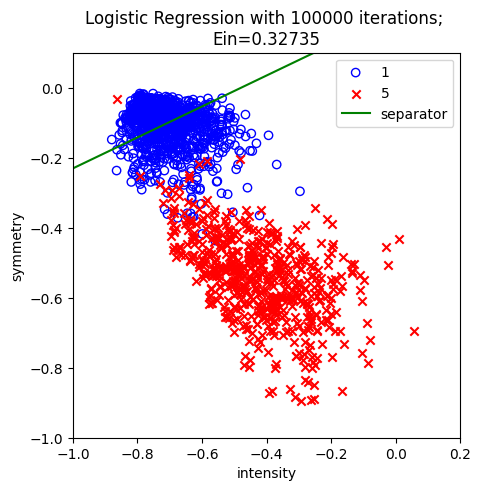

In [34]:
if execute:
    Ein = np.round(E(w_log, Xtrain, ytrain), 5)
    plotLinearSeparator(w_log, Xtrain, ytrain,
                        title=f'Logistic Regression with {max_iters} iterations; \nEin={Ein}')

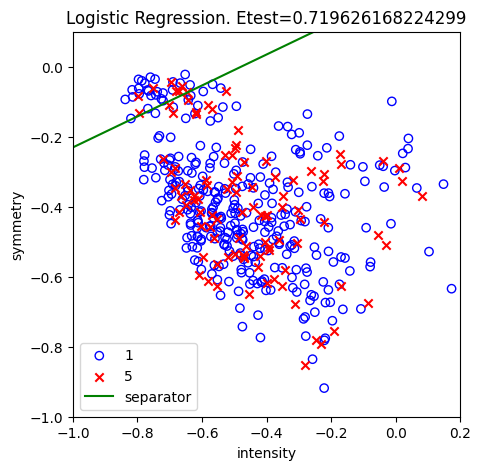

In [35]:
if execute:
    Etest = E(w_log, Xtest, ytest)
    plotLinearSeparator(w_log, Xtest, ytest,
                        title=f'Logistic Regression. Etest={Etest}')

In [36]:
def polynomialTransform(X, Q):
    '''
    Compute the polynomial transform features
    See LFD Example 3.3
    Input:
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: positive integer, the desired degree of polynomial
    Output:
        Z: A 2D N x (dtilde+1) numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[dtilde] contain the transformed features
    Warning and NOTE: This is a hack! Can we do better?
    '''
    '''
    Init
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape
    # NOTE: Compute the features of the Q-th order polynomial transform.
    # It may be easier to implement it only for the value of Q specified in the homework
    # instead of implementing it for all possible values of Q.
    degrees = range(Q+1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'x[{p[i]}]^{c[i]}' for i in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        x = X[n, :]
        z = []
        for t in terms:
            (c, p) = t
            v = np.prod([x[p[i]]**c[i] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z

In [37]:
if execute:
    Xdebug = [[1, 2, 3]]
    Xdebug = np.array(Xdebug)

    Z = polynomialTransform(Xdebug, 3)

    print(f'Z shape {Z.shape}')
    print(Z)

Z shape (1, 10)
[[ 1  3  2  9  4 27  8  6 18 12]]


In [38]:
if execute:
    Q = 3
    Ztrain = polynomialTransform(Xtrain, Q)
    Ztest = polynomialTransform(Xtest, Q)

In [39]:
def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a (d+1) x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2D N x (d+1) numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(5, 5))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 0.21, 100)
    pltx2s = np.linspace(-1, 0.1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransform(pltX, Q=Q)
    pltyhat = predictClassLinear(w, pltZ)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    '''
    Finishing touches
    '''
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    axs.set_title(title)
    axs.legend()
    plt.show()

In [40]:
'''
This is just a quick and dirty example
'''

if execute:
    w_lin = linearRegression(Ztrain, ytrain)
    Ein = np.round(E(w_lin, Ztrain, ytrain), 5)

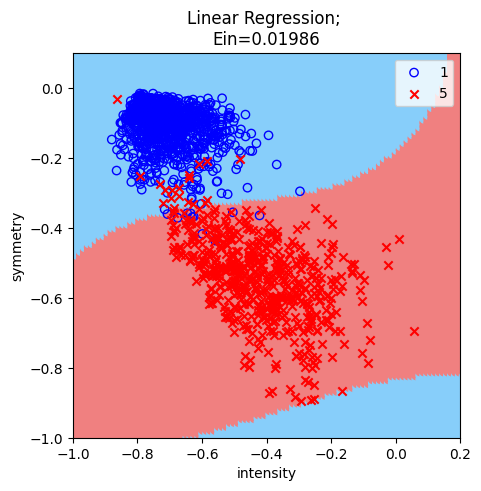

In [41]:
if execute:
    plotNonLinearSeparator(w_lin, Xtrain, ytrain, Q=Q,
                           title=f'Linear Regression; \nEin={Ein}')

### Normalize Features

#### Warning! What is happening here? What are we doing here?


In [42]:


def normalize(X, a=-1, b=1):
    N, d = X.shape
    Xnorm = np.ones((N, d))
    for col in range(1, d):  # assuming column 0 is already set (e.g., bias term)
        Xcol = X[:, col]
        Xmin = np.min(Xcol)
        Xmax = np.max(Xcol)
        # Avoid division by zero in case all values in the column are the same.
        if Xmax != Xmin:
            Xcolnorm = a + (Xcol - Xmin) * (b - a) / (Xmax - Xmin)
        else:
            Xcolnorm = np.full_like(Xcol, a)
        Xnorm[:, col] = Xcolnorm
    return Xnorm


In [43]:
Xnorm = normalize(Xaug)
N, d = Xnorm.shape

assert(Xnorm.shape == Xaug.shape)
assert(np.all( Xnorm[:, 0] == np.ones((N, 1)) ))

##### Well okay, it seems convenient to do some things this way

### Setup Labels for the 1s vs Non 1s Classification Task


In [44]:
for n in range(N):
    if ycombined[n, 0] == 1:
        ycombined[n, 0] = 1
    else:
        ycombined[n, 0] = -1

## Train-Test Split

### Randomly select $K$ data points from the input data

In [45]:
import numpy as np

def splitDataSelectKRandomly(X, y, K):
    '''
    Partitions the input dataset with N data points given by X and y into two parts,
    one with K of the data points selected uniformly at random, and
    the other with the remaining N-K data points
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set.
           X[n, 0] = 1 (e.g., bias term) and X[n, 1], ..., X[n, d-1] are feature values.
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example.
        K: an integer; number of data points to select.
    Output:
        Xselected: a 2 dimensional K x d numpy array, containing K data points selected from X uniformly at random.
        yselected: a 2 dimensional K x 1 numpy array, containing the labels from y corresponding to Xselected.
        Xremaining: a 2 dimensional (N-K) x d numpy array.
        yremaining: a 2 dimensional (N-K) x 1 numpy array.
    '''
    N, d = X.shape
    # Generate an array of indices for all data points
    indices = np.arange(N)
    # Randomly select K unique indices
    selected_indices = np.random.choice(indices, size=K, replace=False)
    # The remaining indices are those not selected
    remaining_indices = np.setdiff1d(indices, selected_indices)

    # Partition the dataset using the selected indices
    Xselected = X[selected_indices, :]
    yselected = y[selected_indices, :]
    Xremaining = X[remaining_indices, :]
    yremaining = y[remaining_indices, :]

    return Xselected, yselected, Xremaining, yremaining


In [46]:
X, y, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 300)

print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
X shape {X.shape} y shape {y.shape}\n\
Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
X shape (300, 3) y shape (300, 1)
Xtest shape (8998, 3), ytest shape (8998, 1)


### Visualize the Data

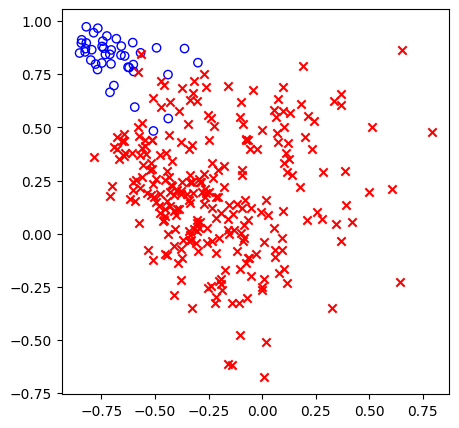

In [47]:
fig, axs = plt.subplots(figsize=(5, 5))
plus1s = np.where(y == 1)[0]
minus1s = np.where(y == -1)[0]
Xplus1s = X[plus1s, :]
Xminus1s = X[minus1s, :]
axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
            color='blue', facecolors='none', label='1')
axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
            marker='x', color='red', label='Not 1')

## Polynomial Transform Revisited - Using Legendre Polynomials

In [48]:
def LegendrePolynomials(x, Q):
    '''
    Compute values of P₀(x), P₁(x), …, P_Q(x)
    '''
    if Q == 0:
        return [1.0]

    L = [1.0, float(x)]
    for k in range(2, Q+1):
        L.append(((2*k - 1)*x*L[k-1] - (k-1)*L[k-2]) / k)
    return L


In [49]:
import numpy as np
from itertools import product

def polynomialTransformLegendre(X, Q):
    '''
    Compute the Legendre Polynomial Feature Transform (LFD §3.3)
    '''
    N, d = X.shape

    # Drop intercept column if present
    if np.all(X[:, 0] == 1):
        X = X[:, 1:]
        N, d = X.shape

    # Generate all multi‑indices of length d whose total degree is between 1 and Q
    multi_indices = [idx for idx in product(range(Q+1), repeat=d)
                     if 0 < sum(idx) <= Q]

    # Precompute P_k(x_j) for all examples, dims, and orders
    Lvals = np.zeros((N, d, Q+1))
    for j in range(d):
        for n in range(N):
            Lvals[n, j, :] = LegendrePolynomials(X[n, j], Q)

    # Build Z: first column = 1, then one column per multi-index
    Z = np.ones((N, 1 + len(multi_indices)))
    for col, idx in enumerate(multi_indices, start=1):
        # multiply across dimensions for each example
        Z[:, col] = np.prod([Lvals[:, j, k] for j, k in enumerate(idx)], axis=0)

    return Z


In [50]:
Q = 6

Z = polynomialTransformLegendre(X, Q)
print(f'Z shape {Z.shape}')
Ztest = polynomialTransformLegendre(Xtest, Q)
print(f'Ztest shape {Ztest.shape}')

Z shape (300, 28)
Ztest shape (8998, 28)


In [51]:
'''
Updated plotting routine to use Legendre Polynomial transform instead
'''
def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a d x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 100)
    pltx2s = np.linspace(-1, 1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransformLegendre(pltX, Q=Q)
    pltyhat = predictClassLinear(w, pltZ)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.show()

## Linear Regression with Regularization: The One Step $E_\text{aug}$ Minimizing Algorithm

In [52]:
def squaredError(w, X, y):
    '''
    point-wise sum of squared error (for regression)
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
    Output:
        error: sum of squared errors of hypothesis w on data points in X with true labels y
    '''
    # TODO-6: Complete this implementation
    residuals = X @ w - y
    error = np.sum(residuals**2) / X.shape[0]
    return error


### Linear Regression with Regularization

In [53]:
import numpy as np

def linearRegressionRegularized(X, y, lamda):
    '''
    Implements the one-step algorithm for Linear Regression with L2 regularization
    '''
    N, d = X.shape
    identity_matrix = np.eye(d)
    identity_matrix[0, 0] = 0  # No regularization for bias term (X[:,0])

    # Compute optimal weights using regularized closed-form solution
    w = np.linalg.inv(X.T @ X + lamda * identity_matrix) @ X.T @ y

    return w


### Experiments with Linear Regression with Regularization

In [54]:
lamda = 0
w_reg = linearRegressionRegularized(Z, y, lamda)

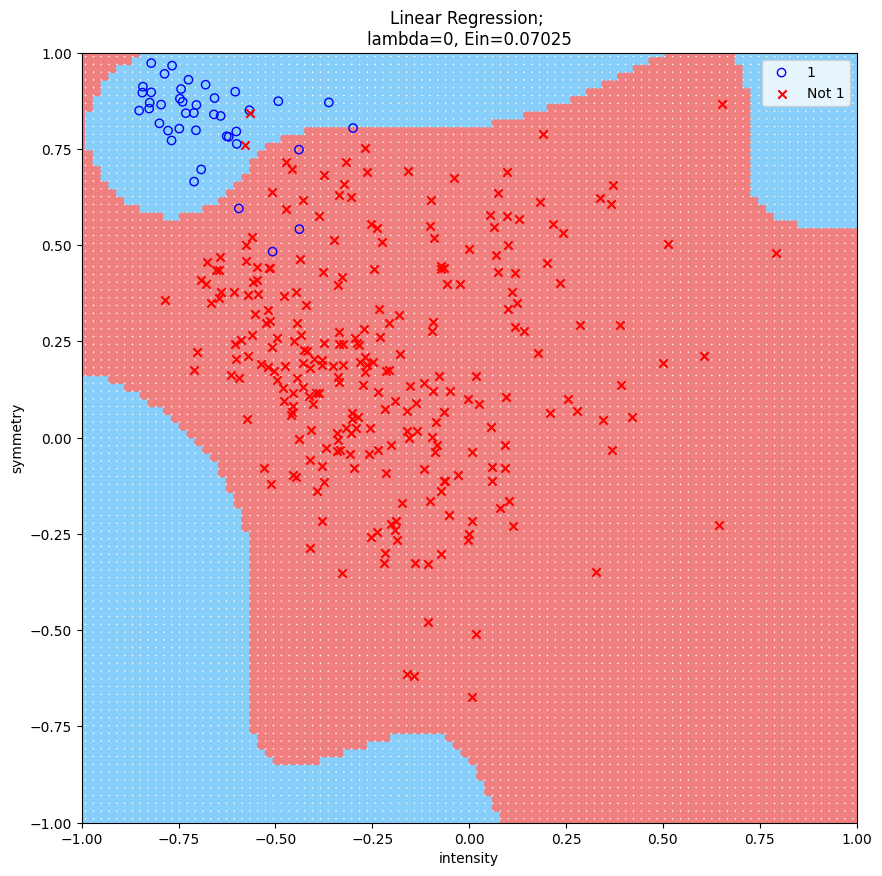

In [55]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

In [56]:
lamda = 10
w_reg = linearRegressionRegularized(Z, y, lamda)

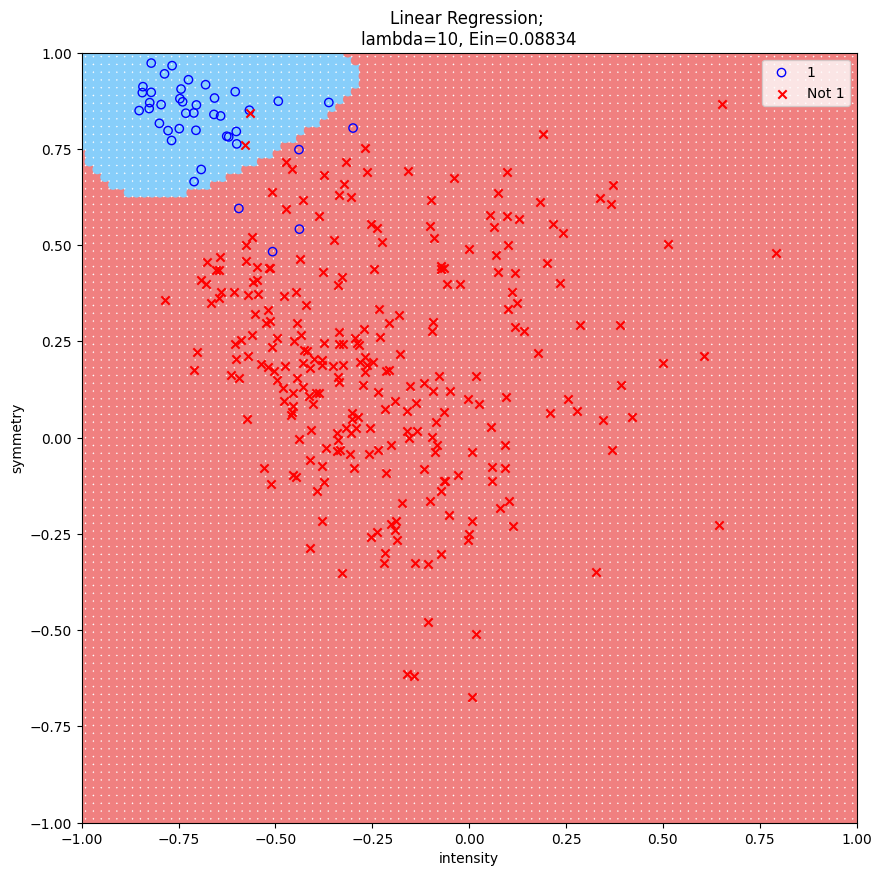

In [57]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

## Leave-One-Out Cross Validation

See Lectures 22 and 23

In [74]:
import numpy as np

def linearRegressionCVError(X, y, lamda):
    '''
    Computes leave-one-out cross-validation (LOOCV) error
    for linear regression with regularization parameter lamda.
    '''
    N, d = X.shape
    Ecv = 0.0

    for n in range(N):
        # Leave one sample out
        X_train = np.delete(X, n, axis=0)
        y_train = np.delete(y, n, axis=0)

        # Regularization (no regularization on bias term)
        reg_matrix = lamda * np.eye(d)
        reg_matrix[0, 0] = 0  # bias term excluded from regularization

        # Optimal weight calculation
        w = np.linalg.inv(X_train.T @ X_train + reg_matrix) @ X_train.T @ y_train

        # Compute squared error for excluded sample
        y_pred = X[n, :] @ w
        Ecv += (y[n, 0] - y_pred)**2

    # Average LOOCV error
    Ecv /= N

    return Ecv

### Experiments with Leave-One-Out Cross Validation

In [75]:
lamda = 0
Ecv = linearRegressionCVError(Z, y, lamda)
print(f'Linear Regression with Regularization with lambda={lamda}, Ecv = {Ecv}')

Linear Regression with Regularization with lambda=0, Ecv = [0.77816233]


### Experiments to Pick Regularization Parameter $\lambda$

Please try other values of $\lambda$ as well.

In [66]:
lamdas = [0, 0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100]
Ecvs = []

for lamda in lamdas:
    Ecv = linearRegressionCVError(Z, y, lamda)
    Ecvs.append(Ecv)

In [67]:
optlamda = lamdas[np.argmin(Ecvs)]

print(optlamda)

0.1
